In [2]:

import numpy as np
import sympy as sp
from sympy.abc import A,a,x,y,c,b
import matplotlib.pyplot as plt


In [3]:

x0, y0 = sp.symbols('x0, y0')

In [4]:

twoD_G_eq = A*(-(x - x0)** 2 + 2*b*(x - x0)*(y - y0) + c*(y - y0)**2)

twoD_G_eq

A*(2*b*(x - x0)*(y - y0) + c*(y - y0)**2 - (x - x0)**2)

In [5]:
def twod_Gauss(A, x, x0, y, y0, b, c):
    inner = ((x - x0)** 2 + 2*b*(x - x0)*(y - y0) + c*(y - y0)**2)
    return A * np.exp(-inner)

In [6]:
def gauss2d(x, y, amp, x0,y0, a, b, c):
    inner = a * (x - x0)**2
    inner += 2 * b * (x - x0)**2 * (y - y0)**2
    inner += c * (y - y0)**2
    return amp * np.exp(-inner)

In [7]:
np.random.seed(1997)
x, y = np.random.random((2, 10))
x0, y0 = 0.3, 0.7
amp, a, b, c = 1, 2, 3, 4

zobs = gauss2d(x, y, amp, x0, y0, a, b, c)

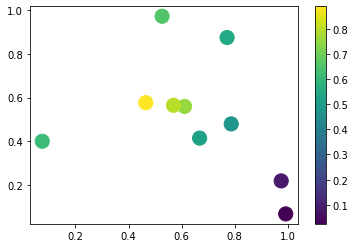

In [8]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=zobs, s=200)
fig.colorbar(scat)
plt.show()

In [9]:
import scipy.optimize as opt

In [10]:
def gauss2d_A(xy, amp, x0, y0, a, b, c):
    x, y = xy
    return gauss2d(x, y, amp, x0, y0, a, b, c)

In [11]:
def main():
    x0, y0 = 0.3, 0.7
    amp, a, b, c = 1,2,3,4
    true_params = [amp, x0, y0, a, b, c]
    xy, zobs = generate_example_data(10,true_params)
    x, y = xy

    i = zobs.argmax()
    guess = [1, x[i], y[i], 1, 1, 1]
    pred_params, uncert_cov = opt.curve_fit(gauss2d_A, xy, zobs, p0=guess)

    zpred = gauss2d_A(xy, *pred_params)
    print(  'True Parameters: ', true_params )
    print(  'Predicted Parameters: ', pred_params )
    print(  'Residual, RMS(obs - pred:',  np.sqrt(np.mean((zobs - zpred)**2)))

    plot(xy, zobs, pred_params)
    plt.show()


def generate_example_data(num, params):
    np.random.seed(1997)
    xy = np.random.random((2, num))

    zobs = gauss2d_A(xy, *params)
    return xy, zobs

def plot(xy, zobs, pred_params):
    x, y = xy
    yi, xi = np.mgrid[:1:30j, -0.2:1.2:30j]
    xyi = np.vstack([xi.ravel(), yi.ravel()])

    zpred = gauss2d_A(xyi, *pred_params)
    zpred.shape = xi.shape

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=zobs, s=200, vmin=zpred.min(), vmax=zpred.max())
    im = ax.imshow(zpred, extent=[xi.min(), xi.max(), yi.max(), yi.min()], aspect='auto')

    fig.colorbar(im)
    ax.invert_yaxis()
    return fig


True Parameters:  [1, 0.3, 0.7, 2, 3, 4]
Predicted Parameters:  [1.  0.3 0.7 2.  3.  4. ]
Residual, RMS(obs - pred: 0.0


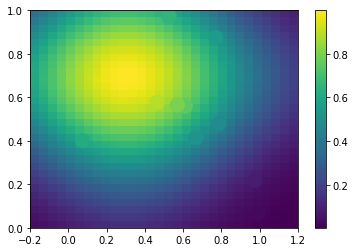

In [12]:
main()

In [13]:
from astropy.io import fits

In [14]:
# basePath = '/media/al-chromebook/USB20FD/Python/Research/fits/Full Maps/'
basePath = '/media/al-linux/USB20FD/Python/Research/fits/Full Maps/'
sofia_full = basePath + 'F0217_FO_IMA_70030015_FORF253_MOS_0001-0348_final_MATT_Corrected.fits'
hdu = fits.open(sofia_full)[0]
sofia_full_image = hdu.data

In [15]:

def newMain(xy):
    amp, a, b, c = 1,2,3,4
    true_params = [amp, x0, y0, a, b, c]
    xy, zobs = generate_example_data(10,true_params)
    x, y = xy

    i = zobs.argmax()
    guess = [1, x[i], y[i], 1, 1, 1]
    pred_params, uncert_cov = opt.curve_fit(gauss2d_A, xy, zobs, p0=guess)

    zpred = gauss2d_A(xy, *pred_params)
    print(  'True Parameters: ', true_params )
    print(  'Predicted Parameters: ', pred_params )
    print(  'Residual, RMS(obs - pred:',  np.sqrt(np.mean((zobs - zpred)**2)))

    plot(xy, zobs, pred_params)
    plt.show()



In [ ]:
x0, y0 = 0.3, 0.7
amp, a, b, c = 1,2,3,4
x, y = 1145, 3417
x_values = sofia_full_image[:,y]
# params = [amp, x0, y0, a, b, c]
zobs = gauss2d_A(xy, amp, x0, y0, a, b, c)

In [ ]:

xy